<a href="https://www.kaggle.com/code/siddp6/shell-ai-waste-to-energy?scriptVersionId=137952757" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

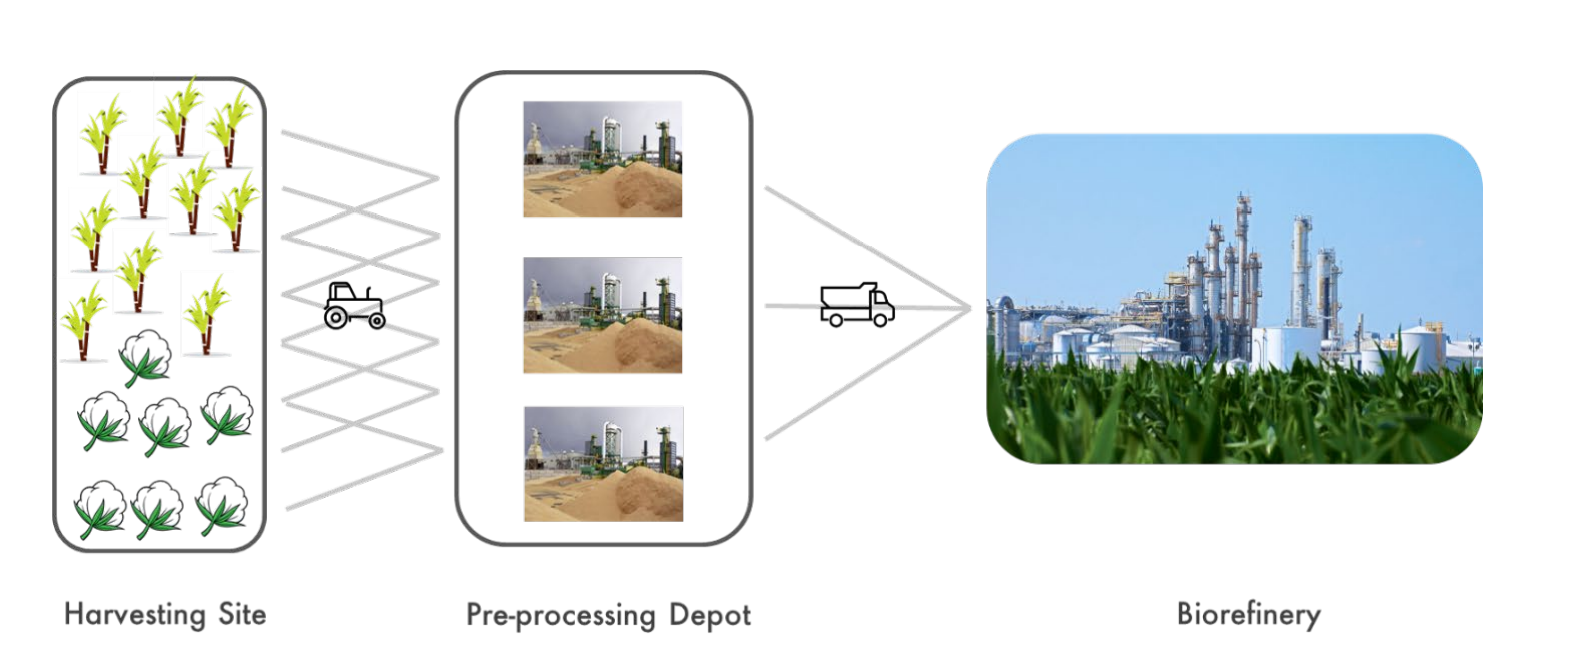

## Step-by-Step Solution

- **Step 0: Import Required Libraries**
  - [X] Import the necessary libraries for data processing, forecasting, optimization, and visualization.

- **Step 1: Data Preprocessing**
  - [X] Load the provided datasets: `Biomass_History.csv` and `Distance_Matrix.csv`.
  - [X] Extract information on biomass availability, distance matrix, and other parameters.
  - [X] Ensure all values are in the correct format and dimensionless.

- **Step 2: Biomass Forecasting for 2018 and 2019**
  - [X] Apply forecasting techniques to estimate biomass availability for the years 2018 and 2019.
  - [X] Create a new datasets, `Biomass_Forecast.csv`, containing forecasted biomass values for each harvesting site.
  - [X] Save the dataset `Biomass_Forecast.csv`


- **Step 3: Define Variables and Constants**
  - [ ] Define the following variables:
    - `Biorefinery`: Binary variable indicating whether a grid block is a biorefinery location.
    - `Depot`: Binary variable indicating whether a grid block is a preprocessing depot location.
    - `Biomass_Demand_Supply[i, j]`: Amount of biomass transported from harvesting site 'i' to depot 'j'.
    - `Pellet_Demand_Supply[j, k]`: Amount of pellets transported from depot 'j' to biorefinery 'k'.
  - [ ] Set constants:
    - `a`, `b`, `c`: Constants for cost computation.
    - `Max_Depots`: Maximum number of preprocessing depots (<= 25).
    - `Max_Refineries`: Maximum number of biorefineries (<= 5).
    - `Max_Depot_Capacity`: Maximum yearly processing capacity of a depot (20,000).
    - `Max_Refinery_Capacity`: Maximum yearly processing capacity of a biorefinery (100,000).

- **Step 4: Formulate the Objective Function**
  - [ ] Define the objective function that minimizes the overall cost of the supply chain.
  - [ ] The objective function should consider transportation costs, biomass forecast mismatch costs, and underutilization costs.

- **Step 5: Formulate the Constraints**
  - [ ] Create constraints to ensure that all quantities are greater than or equal to zero.
  - [ ] Enforce that the amount of biomass procured does not exceed the forecasted biomass at each harvesting site.
  - [ ] Limit the total biomass reaching each preprocessing depot to its yearly processing capacity.
  - [ ] Limit the total pellets reaching each biorefinery to its yearly processing capacity.
  - [ ] Enforce the number of depots to be less than or equal to `Max_Depots`.
  - [ ] Enforce the number of refineries to be less than or equal to `Max_Refineries`.
  - [ ] Ensure that at least 80% of the total forecasted biomass is processed by the refineries each year.
  - [ ] Balance the total biomass entering and exiting each preprocessing depot (within a tolerance limit of 1e-03).

- **Step 6: Optimization**
  - [ ] Utilize appropriate optimization techniques (e.g., mathematical programming, linear programming) to solve the formulated problem.
  - [ ] Find the optimal locations for preprocessing depots and biorefineries.
  - [ ] Allocate biomass quantities and pellets to minimize the objective function while satisfying all constraints.

- **Step 7: Post-processing and Visualization**
  - [ ] Analyze the optimized supply chain to visualize the optimal locations of depots and refineries on the map of Gujarat.
  - [ ] Display the transportation routes for biomass and pellets between harvesting sites, depots, and refineries.
  - [ ] Summarize the total cost and other relevant information about the optimized supply chain.

- **Step 8: Output Submission**
  - [ ] Generate the final output file (`solution.csv`) in the required format with columns for year, data type, source index, destination index, and corresponding values.
  - [ ] Submit the solution file on the HackerEarth portal for evaluation.


# Step 0: Import Required Libraries

In [1]:
!pip install pandas numpy matplotlib pulp

In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pulp import LpProblem, LpVariable, LpMaximize, LpMinimize, lpSum

In [ ]:
warnings.filterwarnings("ignore")

#  Step 1: Data Preparation and Exploration


In [16]:
# Load the datasets
biomass_history_df = pd.read_csv('/kaggle/input/biomasshistory/dataset/Biomass_History.csv')
distance_matrix_df = pd.read_csv('/kaggle/input/biomasshistory/dataset/Distance_Matrix.csv')

In [ ]:
# Check for any missing values in the datasets
print("\nMissing Values in Biomass History Data:")
print(biomass_history_df.isnull().sum())

print("\nMissing Values in Distance Matrix Data:")
print(distance_matrix_df.isnull().sum())

In [ ]:
# Display the first few rows of each dataset to inspect the data
print("Biomass History Data:")
print(biomass_history_df.head())

print("\nDistance Matrix Data:")
print(distance_matrix_df.head())

In [ ]:
# Display the data type
print("Biomass History Info:")
print(biomass_history_df.info())

print("\nDistance Matrix Info:")
print(distance_matrix_df.info())

# Step:2 Biomass Forecasting (Time Series Forecasting)

In [ ]:
# Prepare the data for ARIMA model
biomass_availability = biomass_history_df.iloc[:, 3:].values

# Define the number of time periods (years) for forecasting (2010 to 2017)
num_periods = biomass_availability.shape[1]

# Initialize the forecast array for 2018 and 2019
biomass_forecast_2018 = np.zeros(biomass_availability.shape[0])
biomass_forecast_2019 = np.zeros(biomass_availability.shape[0])


# Loop through each harvesting site and forecast biomass availability for 2018
for i in range(biomass_availability.shape[0]):
    # Fit ARIMA model for each harvesting site
    model = ARIMA(biomass_availability[i, :], order=(1, 1, 0))  # (p, d, q) order
    model_fit = model.fit()
    
    # Forecast biomass availability for 2018 and 2019 (one step ahead forecast)
    forecast_2018 = model_fit.forecast(steps=1)
    forecast_2019 = model_fit.forecast(steps=2)  # Forecast for 2018 and 2019
    
    biomass_forecast_2018[i] = forecast_2018[0]
    biomass_forecast_2019[i] = forecast_2019[1]

In [ ]:
# Display the forecasted biomass for 2018 and 2019 for all harvesting sites
print("Forecasted Biomass for 2018:")
print(biomass_forecast_2018)
print("Forecasted Biomass for 2019:")
print(biomass_forecast_2019)

In [ ]:
# Create a new DataFrame for the forecasted biomass data
biomass_forecast_df = biomass_history_df.copy()

# Add the forecasted biomass for 2018 to the new DataFrame
biomass_forecast_df['2018'] = biomass_forecast_2018
biomass_forecast_df['2019'] = biomass_forecast_2019

# Display the new DataFrame
print(biomass_forecast_df.head())

# Save the new DataFrame as a new CSV file
biomass_forecast_df.to_csv('Biomass_Forecast_Data.csv', index=False)

# Step 3: Define Variables and Constants



In [4]:
# Load the forecast dataset containing historical data and the forecasts for 2018 and 2019
forecast_dataset = pd.read_csv('/kaggle/working/Biomass_Forecast_Data.csv')
print(forecast_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      2418 non-null   int64  
 1   Latitude   2418 non-null   float64
 2   Longitude  2418 non-null   float64
 3   2010       2418 non-null   float64
 4   2011       2418 non-null   float64
 5   2012       2418 non-null   float64
 6   2013       2418 non-null   float64
 7   2014       2418 non-null   float64
 8   2015       2418 non-null   float64
 9   2016       2418 non-null   float64
 10  2017       2418 non-null   float64
 11  2018       2418 non-null   float64
 12  2019       2418 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 245.7 KB
None


In [6]:
# Define the biomass demand-supply matrix and pellet demand-supply matrix for each site and depot/refinery
num_harvesting_sites = len(forecast_dataset)
num_depots = 25
num_refineries = 5

print(num_harvesting_sites, num_depots, num_refineries) # 2418 25 5

2418 25 5


In [7]:
# Create the linear programming problem
prob = LpProblem("Biomass_Supply_Chain", LpMinimize)

In [8]:
# Decision variables: biomass[i][j] represents biomass quantity transported from site i to depot j
biomass = []
for i in range(num_harvesting_sites):
    biomass_row = []
    for j in range(num_depots):
        biomass_row.append(LpVariable(f'Biomass_{i}_{j}', lowBound=0))
    biomass.append(biomass_row)

# Decision variables: pellets[j][k] represents pellet quantity transported from depot j to refinery k
pellets = []
for j in range(num_depots):
    pellets_row = []
    for k in range(num_refineries):
        pellets_row.append(LpVariable(f'Pellets_{j}_{k}', lowBound=0))
    pellets.append(pellets_row)

In [19]:
# Define the cost coefficients for biomass transportation from sites to depots and pellets transportation from depots to refineries
cost_biomass_transport = distance_matrix_df.values  
cost_pellet_transport = distance_matrix_df.values  

In [20]:
# Set the objective function
prob += lpSum(biomass[i][j] * cost_biomass_transport[i][j] for i in range(num_harvesting_sites) for j in range(2))
prob += lpSum(pellets[j][k] * cost_pellet_transport[j][k] for j in range(num_depots) for k in range(num_refineries))

/opt/conda/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [ ]:
prob += lpSum(
    biomass[i][j] * cost_biomass_transport[i][j]
    for i in range(num_harvesting_sites)  # Iterate through the harvesting sites
    for j in range(2)  # Iterate through two options (e.g., different transportation methods)
) + lpSum(
    pellets[j][k] * cost_pellet_transport[j][k]
    for j in range(num_depots)  # Iterate through the depots
    for k in range(num_refineries)  # Iterate through the refineries
)

In [34]:
print(biomass_history_df.iloc[1, -1])

42.1269455


In [36]:
# Constraint 1: Biomass transportation from harvesting sites to depots must be less than or equal to forecasted biomass
for i in range(num_harvesting_sites):
    prob += lpSum(biomass[i][j] for j in range(num_depots)) <= forecast_dataset.iloc[i][-1]

# Constraint 2: Total biomass reaching each depot must be less than or equal to its yearly processing capacity
max_depot_capacity = 20000
for j in range(num_depots):
    prob += lpSum(biomass[i][j] for i in range(num_harvesting_sites)) <= max_depot_capacity

# Constraint 3: Total pellets reaching each refinery must be less than or equal to its yearly processing capacity
max_refinery_capacity = 100000
for k in range(num_refineries):
    prob += lpSum(pellets[j][k] for j in range(num_depots)) <= max_refinery_capacity

# Constraint 4: At least 80% of the total forecasted biomass must be processed by refineries each year
total_forecasted_biomass = forecast_dataset.iloc[:, -1].sum()
total_processed_biomass = lpSum(pellets[j][k] for j in range(num_depots) for k in range(num_refineries))
prob += total_processed_biomass >= 0.8 * total_forecasted_biomass

# Constraint 5: Total biomass entering each preprocessing depot must be equal to the total pellets exiting that depot
for j in range(num_depots):
    prob += lpSum(biomass[i][j] for i in range(num_harvesting_sites)) == lpSum(pellets[j][k] for k in range(num_refineries))

# Constraint 6: Number of depots should be less than or equal to 25
num_depots_constraint = 25
prob += lpSum(pellets[j][k] for j in range(num_depots) for k in range(num_refineries)) == num_depots_constraint

# Constraint 7: Number of refineries should be less than or equal to 5
num_refineries_constraint = 5
prob += lpSum(pellets[j][k] for j in range(num_depots) for k in range(num_refineries)) == num_refineries_constraint

In [ ]:
# Solve the linear programming problem
prob.solve()

In [ ]:
# Display the optimized results
print("Optimal Biomass Transportation:")
for i in range(num_harvesting_sites):
    for j in range(num_depots):
        print(f"Biomass_{i}_{j}: {biomass[i][j].varValue}")
print("Optimal Pellet Transportation:")
for j in range(num_depots):
    for k in range(num_refineries):
        print(f"Pellets_{j}_{k}: {pellets[j][k].varValue}")

In [ ]:
# Optionally, save the optimized results in a CSV file
optimized_results = pd.DataFrame(index=range(num_harvesting_sites), columns=['Harvesting Site', 'Depot', 'Biomass Transportation', 'Pellet Transportation'])
for i in range(num_harvesting_sites):
    for j in range(num_depots):
        optimized_results.loc[i, 'Harvesting Site'] = i
        optimized_results.loc[i, 'Depot'] = j
        optimized_results.loc[i, 'Biomass Transportation'] = biomass[i][j].varValue
for j in range(num_depots):
    for k in range(num_refineries):
        optimized_results.loc[j*num_refineries + k, 'Pellet Transportation'] = pellets[j][k].varValue
optimized_results.to_csv('Optimized_Supply_Chain.csv', index=False)

# Rough

In [ ]:
# # Create an empty DataFrame to store the forecasted biomass data for all sites
# biomass_forecast_data = pd.DataFrame()

# # Create a time index for the forecasted years
# forecast_time_index = pd.date_range(start="2018", periods=2, freq="A")

# # Iterate through all harvesting sites
# for harvesting_site_index in range(len(biomass_history_df)):
#     # Extract the biomass data for the selected harvesting site
#     biomass_timeseries = biomass_history_df.iloc[harvesting_site_index, 3:].values

#     # Convert biomass_timeseries to numeric values
#     biomass_timeseries = pd.to_numeric(biomass_timeseries, errors='coerce')

#     # Create a time series object
#     biomass_series = pd.Series(biomass_timeseries, index=time_index)

#     # Fit the ARIMA model
#     model = ARIMA(biomass_series, order=(3, 1, 1))
#     model_fit = model.fit()

#     # Forecast biomass availability for the years 2018 and 2019
#     forecasted_values = model_fit.forecast(steps=2)

#     # Create a DataFrame to store the forecasted biomass data for the current site
#     site_forecast_data = pd.DataFrame({
#         'harvesting_site_index': [harvesting_site_index] * 2,
#         'year': forecast_time_index.year,
#         'biomass_forecast': forecasted_values
#     })

#     # Append the site_forecast_data to the overall biomass_forecast_data
#     biomass_forecast_data = biomass_forecast_data.append(site_forecast_data, ignore_index=True)


In [ ]:
# # Save the Biomass Forecast data to the Kaggle output directory
# biomass_forecast_data.to_csv("Biomass_Forecast.csv", index=False)

In [ ]:
# print(biomass_forecast_data)

In [ ]:
# # Load the biomass forecast data for the years 2018 and 2019
# biomass_forecast_data = pd.read_csv('/kaggle/input/biomassforecast/Biomass_Forecast (1).csv')

# # Determine the number of clusters for K-means (e.g., 2 clusters for 2 potential locations)
# num_clusters = 2

# # List to store cluster centers for all sites
# all_cluster_centers = []

# # Loop over each harvesting site
# for harvesting_site_index in range(2418):  # Assuming there are 2418 harvesting sites
#     # Select the forecasted biomass availability for the current harvesting site
#     forecasted_biomass = biomass_forecast_data.loc[biomass_forecast_data['harvesting_site_index'] == harvesting_site_index, 'biomass_forecast'].values
    
#     # Convert the forecasted biomass to numeric values
#     forecasted_biomass = pd.to_numeric(forecasted_biomass, errors='coerce')
    
#     # Reshape the forecasted biomass data for K-means clustering
#     X = forecasted_biomass.reshape(-1, 1)

#     # Perform K-means clustering
#     kmeans = KMeans(n_clusters=num_clusters, random_state=0)
#     kmeans.fit(X)

#     # Get the cluster centers (potential locations for Depots and Biorefineries) for the current site
#     cluster_centers = kmeans.cluster_centers_
    
#     # Add the cluster centers to the list for all sites
#     all_cluster_centers.append(cluster_centers)

# # Convert the list to a numpy array for easier handling
# all_cluster_centers = np.array(all_cluster_centers)

# # Display the cluster centers for all sites
# print(all_cluster_centers)


In [ ]:
# # Load Biomass_History.csv for forecasted biomass values
# biomass_forecast_df = pd.read_csv('/kaggle/input/biomassforecast/Biomass_Forecast (1).csv')

# # Load Distance_Matrix.csv for distance data
# distance_matrix_df = pd.read_csv('/kaggle/input/biomasshistory/dataset/Distance_Matrix.csv')


In [ ]:
# # Constants
# a = 0.001
# b = 1
# c = 1

# # Maximum yearly processing capacity of depot and refinery
# max_capacity_depot = 20000
# max_capacity_refinery = 100000

# # Number of depots and refineries (you can adjust these based on the constraints)
# num_depots = 5
# num_refineries = 3

In [ ]:
# def biomass_lp_forecast(biomass_forecast, distance_matrix):
#     # Extract relevant data from dataframes
#     num_harvesting_sites = len(biomass_forecast)
#     num_years = len(biomass_forecast.columns) - 1

#     # Convert DataFrame to numpy array for LP optimization
#     biomass_forecast_values = biomass_forecast.drop(columns=['Index', 'Latitude', 'Longitude']).values

#     # Define LP variables and constraints
#     biomass_transport_bounds = [(0, None) for _ in range(num_harvesting_sites * num_depots)]
#     pellet_transport_bounds = [(0, None) for _ in range(num_depots * num_refineries)]
    
#     # Constraints lists
#     biomass_constraints = []
#     pellet_constraints = []

#     # Biomass demand-supply constraints
#     for i in range(num_harvesting_sites):
#         biomass_constraints.append({'type': 'ineq', 'fun': lambda x, i=i: biomass_forecast_values[i, 1:].sum() - x[i*num_years:(i+1)*num_years].sum()})

#     # Depot processing capacity constraints
#     for j in range(num_depots):
#         biomass_constraints.append({'type': 'ineq', 'fun': lambda x, j=j: max_capacity_depot - x[j*num_years*num_harvesting_sites:(j+1)*num_years*num_harvesting_sites].sum()})

#     # Refinery processing capacity constraints
#     for k in range(num_refineries):
#         pellet_constraints.append({'type': 'ineq', 'fun': lambda x, k=k: max_capacity_refinery - x[k*num_years*num_depots:(k+1)*num_years*num_depots].sum()})

#     # Solve the LP optimization problem
#     c = np.hstack([distance_matrix.flatten() for _ in range(num_years)])
#     res = linprog(c, A_ub=biomass_constraints + pellet_constraints, bounds=biomass_transport_bounds + pellet_transport_bounds, method='highs')

#     return res.x.reshape(num_years, num_harvesting_sites, num_depots), res.x.reshape(num_years, num_depots, num_refineries)


In [ ]:
# # Call the LP formulation function with the forecasted values and distance matrix
# biomass_transport, pellet_transport = biomass_lp_forecast(biomass_forecast_df, distance_matrix_df)